# Matplotlib

## Importation de la bibliothèque

In [1]:
#On importe le module pyplot de la bibliothèque matplotlib
from matplotlib import pyplot as plt

## Bases de la création d'un graphique avec pyplot
Nous allons d'abord voir comment créer simplement un graphique 2D avec deux listes sans paramètres changeant l'esthétisme et la lecture du graphique

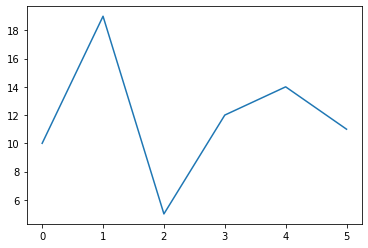

In [2]:
x = [0,1,2,3,4,5]
y = [10,19,5,12,14,11]

plt.figure() #Initialise la figure
plt.plot(x,y) #Réalise le tracé, x et y doivent ABSOLUMENT avoir la même taille
#Sinon erreur : x and y must have same first dimension
plt.show() #Affiche le graphique

La première chose à faire est de rajouter des légendes, un titre et de redimensionner notre figure, qui est ici un peu petite

Les légendes se font avec plt.xlabel() pour l'axe horizontal et plt.ylabel() pour l'axe vertical

Le titre s'ajoute avec plt.title()

Et enfin, la taille de la figure s'ajoute comme argument de plt.figure() avec (largeur,hauteur)

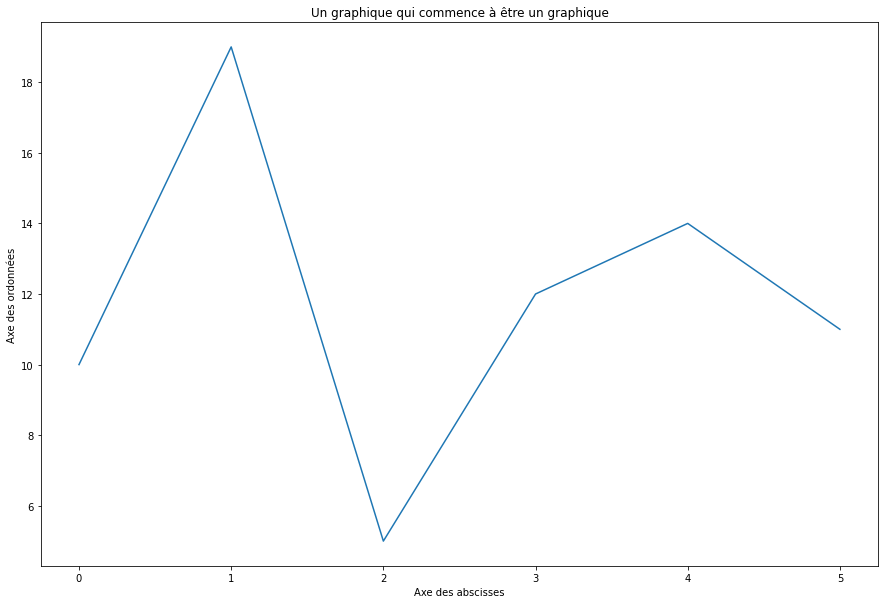

In [3]:
plt.figure(figsize = (15,10))
plt.plot(x,y)
plt.xlabel("Axe des abscisses")
plt.ylabel("Axe des ordonnées")
plt.title("Un graphique qui commence à être un graphique")
plt.show()

## Ajout de plusieurs données sur un même graphique et numpy
On peut tracer plusieurs fonctions dans un même plt.plot(), mais pour s'y retrouver, il va falloir utiliser des labels en argument des différents plt.plot() afin de bien reconnaître les fonctions tracées

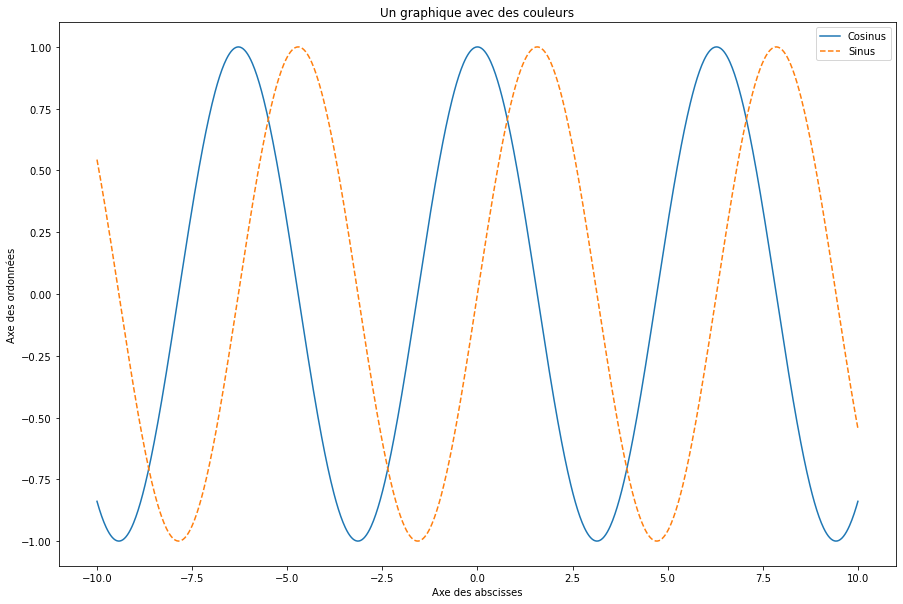

In [4]:
import numpy as np

#Nous allons désormais tracer des graphiques avec des données de type array de numpy

x = np.linspace(-10,10,1000)

y1 = np.cos(x)
y2 = np.sin(x)


plt.figure(figsize = (15,10))
plt.plot(x,y1,label = "Cosinus") 
plt.plot(x,y2,label = "Sinus",linestyle = "dashed") #Linestyle modifie l'apparence du tracé
plt.xlabel("Axe des abscisses")
plt.ylabel("Axe des ordonnées")
plt.legend() #Ligne à ajouter pour afficher les labels des plt.plot() (ça commence à faire long...)
plt.title("Un graphique avec des couleurs")
plt.show()

## Tracé avec incertitudes
Nous allons désormais ajouter à nos graphiques ce que tout expérimentateur adore : des barres d'incertitudes !

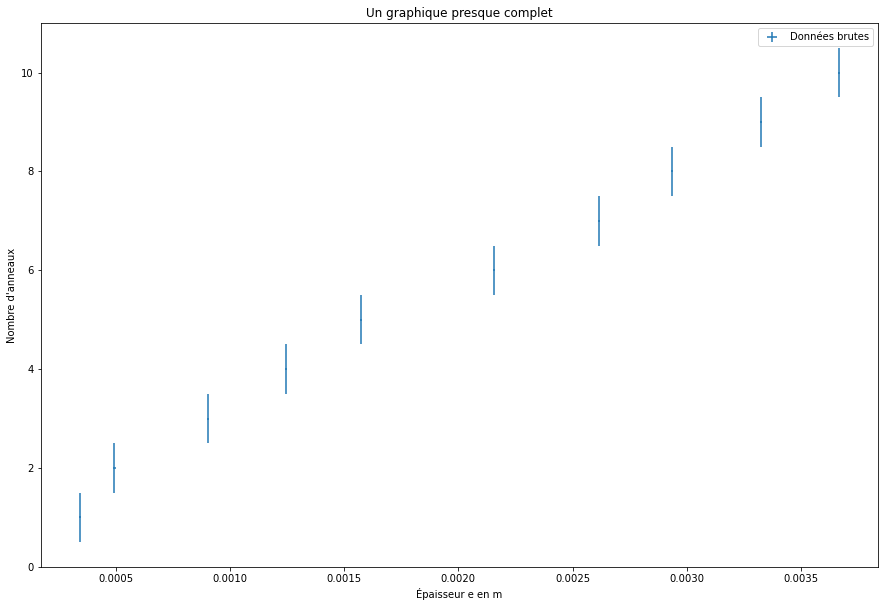

In [5]:
#Les données utilisées ici proviennet du TP sur l'interféromètre de Michelson

n_anneaux = np.array([1,2,3,4,5,6,7,8,9,10])
dist = np.array([25.77,25.92,26.33,26.67,27.00,27.58,28.04,28.36,28.75,29.09])*10**(-3)-25.425*10**(-3)

#Les incertitudes doivent bien sûr avoir la même dimension que les données !
in_n_anneaux = [0.5]*10 #Incertitude sur n_anneaux
in_dist = [0.005*10**(-3)]*10 #Incertitude sur dist

fig = plt.figure(figsize=(15,10))
#plt.errorbar(x,y,xerr=incertitude_abscisses,yerr=incertitude_ordonnée)
#linestyle nous permet de changer l'allure de la courbe, ici on la rend invisible comme on veut des points
plt.errorbar(dist,n_anneaux,xerr=in_dist,yerr=in_n_anneaux,linestyle="none",label="Données brutes")
plt.legend()
plt.ylabel("Nombre d'anneaux")
plt.xlabel("Épaisseur e en m")
plt.title("Un graphique presque complet")
plt.show()

## Régression linéaire de données brutes et sauvegarde
Les données doivent être traitées et il peut être intéressant (par exemple pour nos données ici) de  réaliser une régression linéaire sur les données brutes

Cette régression est réalisée à l'aide de la bibliothèqe scipy et son module stats

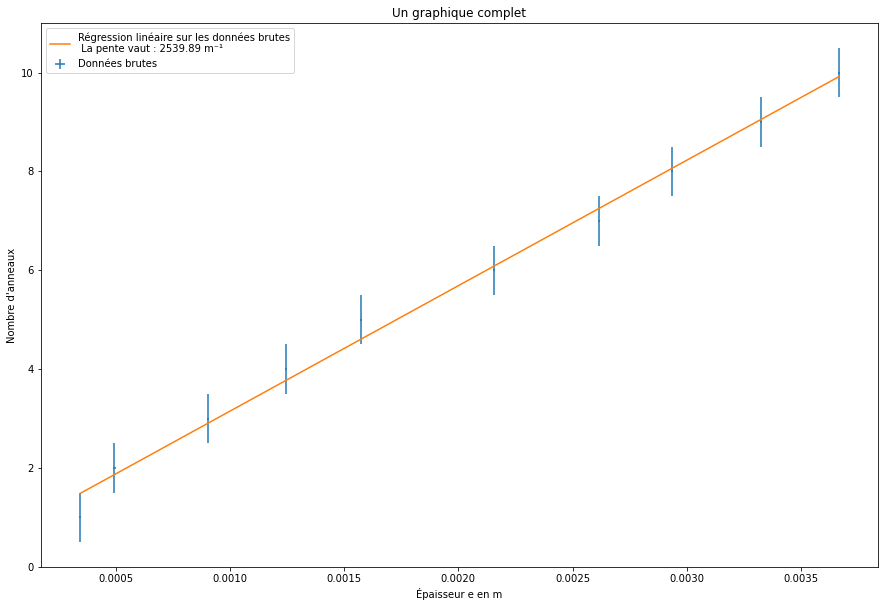

In [17]:
from scipy import stats

regress = stats.linregress(dist,n_anneaux)

#On peut extraire la pente de la droite obtenue en prenant le premier élément de stats.linregress() et l'origine en 0 avec le deucième élément

pente = regress[0]
origine = regress[1]

#Ce qui nous permet de la tracer (a*x+b) et de print ces deux paramètres

fig = plt.figure(figsize=(15,10))
plt.errorbar(dist,n_anneaux,xerr=in_dist,yerr=in_n_anneaux,linestyle="none",label="Données brutes")

plt.plot(dist,pente*dist+origine,label = "Régression linéaire sur les données brutes\n La pente vaut : " + str(round(pente,2)) + " m⁻¹")
plt.legend()
plt.ylabel("Nombre d'anneaux")
plt.xlabel("Épaisseur e en m")
plt.title("Un graphique complet")
plt.savefig("Titre du fichier du graphique complet")
plt.show()

## Régression avec d'autres fonctions et échelle logarithmique
Il est possible de réaliser une régression sur d'autres données dont nous connaissons la fonction et ce grâce à un autre module de la blibliothèque scipy : curve_fit

L'exemple utilisé ici correspond à des données qui se répartissent théoriquement selon $f(x)=ae^{-bx}+c$

De plus, on peut changer l'échelle de l'axe x ou y pour passer par exemple en échelle logarithmique avec plt.xscale() (pour l'axe x) ou plt.yscale() (pour l'axe y)

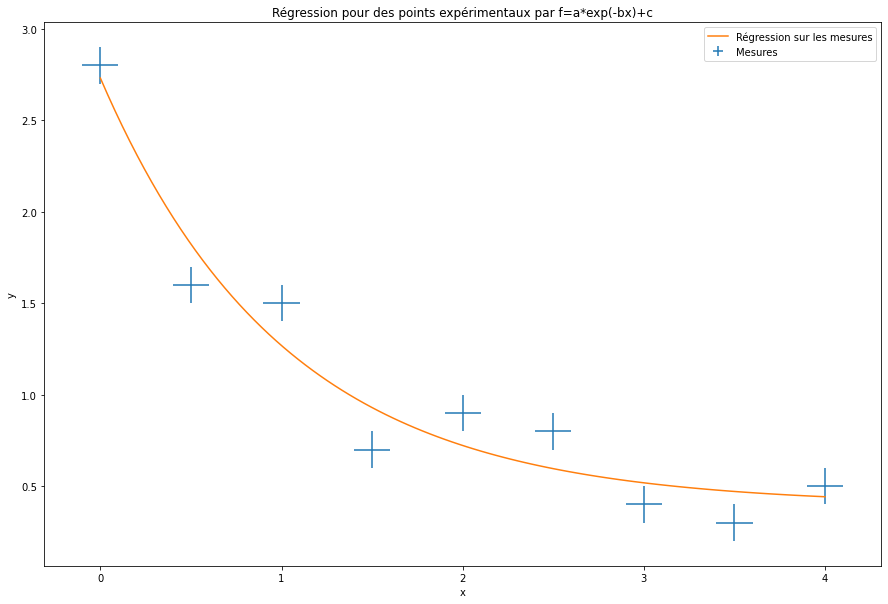

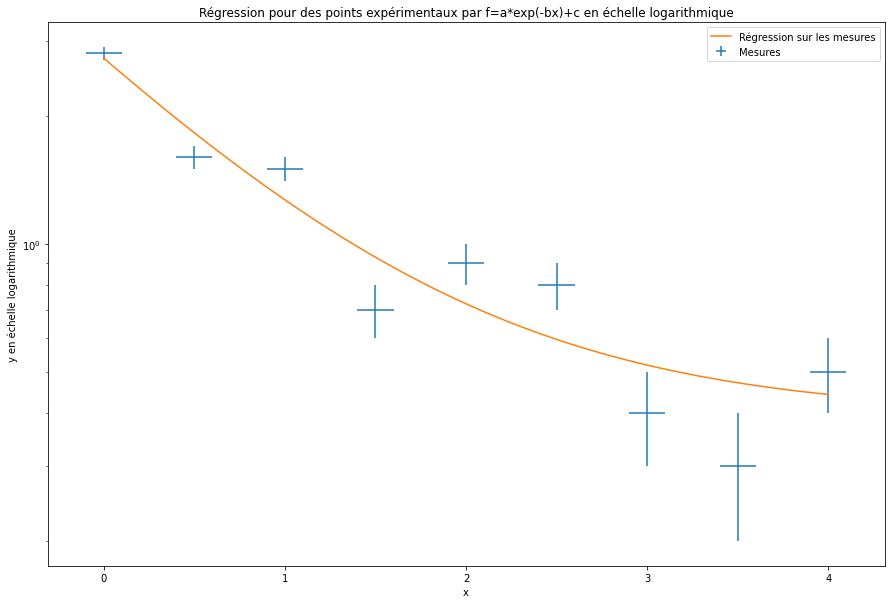

In [25]:
from scipy.optimize import curve_fit

#La fonction théorique représentant bien les données
def fonction_fit(x, a, b, c):
    return a * np.exp(-b * x) + c

#Les données brutes
x = np.array([ 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0])
y = np.array([2.8, 1.6, 1.5, 0.7, 0.9, 0.8, 0.4, 0.3, 0.5])
incertitude = np.array([0.1]*9)
x_trace_fit = np.linspace(0,4,100) #Pour tracer une fontion régressée "lissée"

#Les paramètres initiaux utilisé par scipy pour la régression
param0 = np.array([0.0, 0.0, 0.0])

#curve_fit(fonction à fit,données,données,paramètres initiaux,incertitude)
values, cov = curve_fit(fonction_fit, x, y, param0, incertitude)
#En sortie on a values qui est un tableau contenant les valeurs estimées des paramètres de la fonction
#cov nous donne la matrice de covariance, les incertitudes étant alors les racines carrés des éléments de la diagonale

plt.figure(figsize=(15,10))
plt.errorbar(x,y,xerr=incertitude,yerr=incertitude,label="Mesures",linestyle="None")
plt.plot(x_trace_fit,fonction_fit(x_trace_fit,values[0],values[1],values[2]),label="Régression sur les mesures")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Régression pour des points expérimentaux par f=a*exp(-bx)+c")
plt.legend()
plt.show()


plt.figure(figsize=(15,10))
plt.errorbar(x,y,xerr=incertitude,yerr=incertitude,label="Mesures",linestyle="None")
plt.plot(x_trace_fit,fonction_fit(x_trace_fit,values[0],values[1],values[2]),label="Régression sur les mesures")
plt.xlabel("x")
plt.ylabel("y en échelle logarithmique")
plt.yscale("log")
plt.title("Régression pour des points expérimentaux par f=a*exp(-bx)+c en échelle logarithmique")
plt.legend()
plt.show()

## Animations avec matplotlib
Un module marrant mais pas souvent utile de matplotlib permet d'animer le contenu d'un graphique à partir de fonction

Nous allons voir les bases pour faire de petites animations

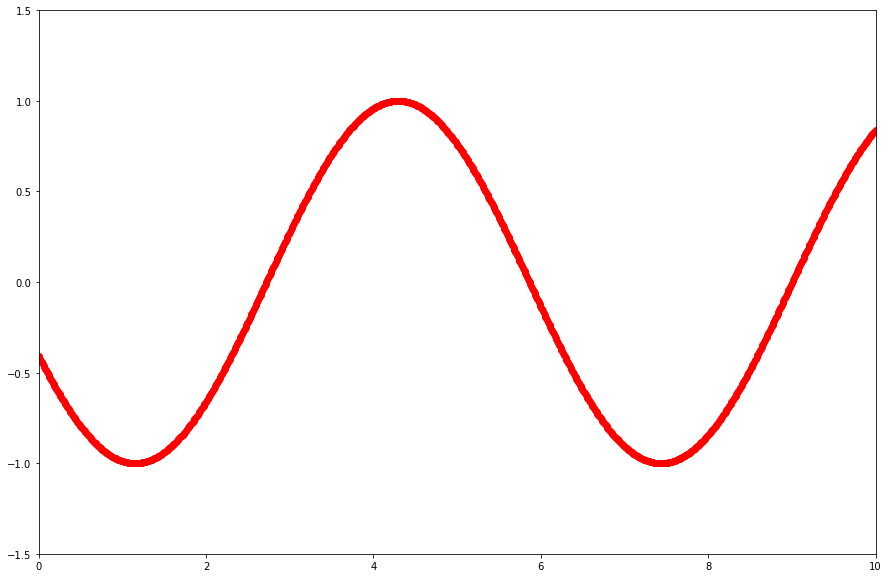

In [10]:
from matplotlib import animation

def init():
    ax.set_xlim(0, 10)
    ax.set_ylim(-1.5, 1.5)
    return line,

def fig_update(k):
    x = np.linspace(0,10,1000)
    y = np.cos(x+k*0.01)

    line.set_data(x,y)
    return line,
    
fig, ax = plt.subplots(figsize=(15,10))
line, = ax.plot([], [], 'ro')

anim = animation.FuncAnimation(fig, fig_update, init_func = init, interval=50, blit=True, frames=200)
anim.save(filename="courbe.mp4", dpi =80, fps=60)

## Tracés 3D, colormesh
Il est possible de réaliser des tracés en 3D avec mais il peut être souvent plus pertinent pour une meilleure lisiblité de réaliser un tracé à l'aide de "colormesh" qui ajoute une barre nous permettant de représenter la 3ème dimension à partir de données d'un array 2D

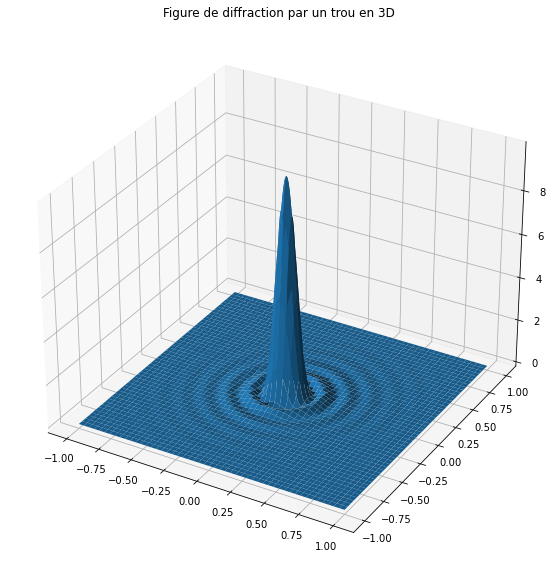

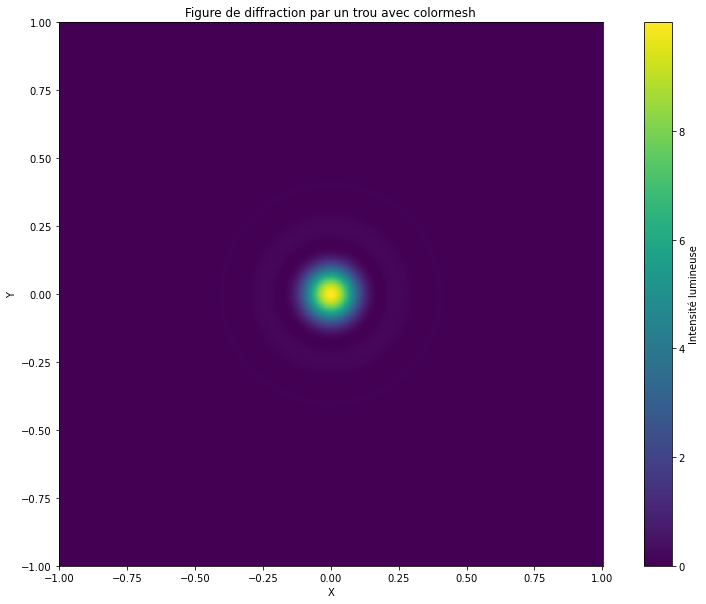

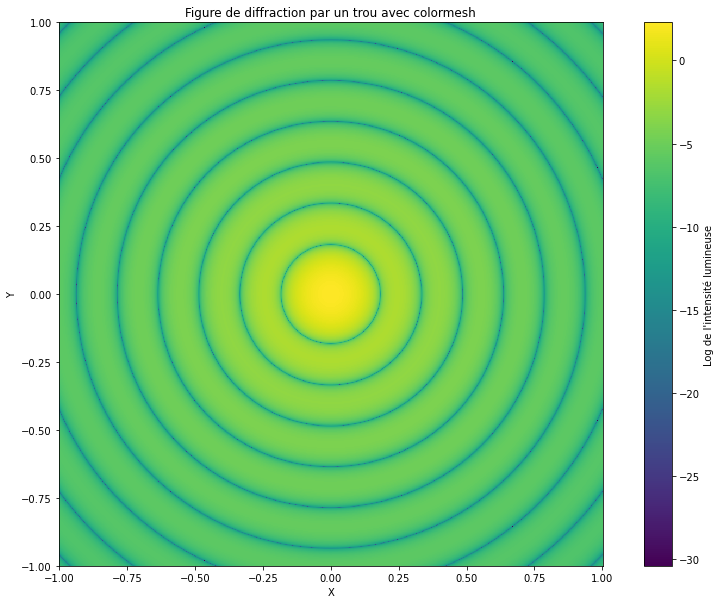

In [21]:
from scipy.special import jn

def J1(eta):
    J1 = jn(1,eta)
    return J1

def diffraction_trou(x,y,d):
    eta = np.pi*d*np.sqrt(x**2+y**2)/(lam*D)
    return (4*L0*(jn(1,eta)/eta)**2)

d = 0.1*10**-4 #Diamètre du trou circulaire

x = np.linspace(-1,1,1000)
y = np.linspace(-1,1,1000)
lam = 500*10**(-9)
D = 3
L0 = 10


xx, yy = np.meshgrid(x,y) #Nous permet d'obtenir une "grille" 2D à partir de deux arrays

#Tracé des données en 3D
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection="3d")
surf = ax.plot_surface(xx,yy,diffraction_trou(xx,yy,d))
plt.title("Figure de diffraction par un trou en 3D")
plt.show()

#Tracé des données en 3D avec colormesh
fig = plt.figure(figsize=(15,10))
plt.pcolormesh(xx,yy,diffraction_trou(xx,yy,d),shading="nearest")
plt.axis("square") #Cette fonction sert à fixer le ratio de la largeur et de la lon guer de la figure à 1:1
cbar = plt.colorbar() #On ajoute une barre qui sert d'échelle pour la 3ème dimension que nous représentons
cbar.set_label("Intensité lumineuse") #On change le nom de la barre
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Figure de diffraction par un trou avec colormesh")
plt.show()

#Tracé des données en 3D avec colormesh en échelle logarithmique
fig = plt.figure(figsize=(15,10))
plt.pcolormesh(xx,yy,np.log(diffraction_trou(xx,yy,d)),shading="nearest")
plt.axis("square") #Cette fonction sert à fixer le ratio de la largeur et de la lon guer de la figure à 1:1
cbar = plt.colorbar() #On ajoute une barre qui sert d'échelle pour la 3ème dimension que nous représentons
cbar.set_label("Log de l'intensité lumineuse") #On change le nom de la barre
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Figure de diffraction par un trou avec colormesh")
plt.show()